In [3]:
import pandas as pd # load and manipulate data and for One-Hot Encodin
import numpy as np # calculate the mean and standard deviation
import xgboost as xgb # XGBoost stuff
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # for scoring during
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
# Load the dataset from the .csv file
df = pd.read_csv("./Telco_customer_churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [6]:
# df.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis=1, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns

### Check for columns with only 1 option

In [7]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [8]:
df.drop(['customerID'], axis=1, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns

Remove black spaces in the values.

In [9]:
# df['City'].replace(' ', '_', regex=True, inplace=True)

Remove black spaces in the col names.

In [10]:
# df.coumns = df.columns.str.replace(' ', '_')

In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Encode the objects

In [12]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
df.loc[(df['TotalCharges'] == ' '), 'TotalCharges'] = 0

In [14]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

## X and y

In [15]:
X = df.drop('Churn', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1]
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [16]:
y = df['Churn'].map({'Yes': 1, 'No': 0}).copy()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

## One hot encode

In [17]:
pd.get_dummies(X, columns=['PaymentMethod']).head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,29.85,29.85,0,0,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,56.95,1889.50,0,0,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,0,0,0,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,42.30,1840.75,1,0,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,70.70,151.65,0,0,1,0


In [18]:
X_encoded = pd.get_dummies(X, columns=['gender',
                                       'Partner',
                                       'Dependents',
                                       'PhoneService',
                                       'MultipleLines',
                                       'InternetService',
                                       'OnlineSecurity',
                                       'OnlineBackup',
                                       'DeviceProtection',
                                       'TechSupport',
                                       'StreamingTV',
                                       'StreamingMovies',
                                       'Contract',
                                       'PaperlessBilling',
                                       'PaymentMethod'])
X_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


## Split the df


In [19]:
sum(y) / len(y)

0.2653698707936959

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.33, random_state=42)

In [21]:
sum(y_train) / len(y_train), sum(y_test) / len(y_test)

(0.26303518440016954, 0.2701075268817204)

# Train

In [22]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=1, seed=42)
clf_xgb.fit(X_train,
            y_train,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.64590


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-aucpr:0.66422
[2]	validation_0-aucpr:0.67633
[3]	validation_0-aucpr:0.68213
[4]	validation_0-aucpr:0.68623
[5]	validation_0-aucpr:0.68420
[6]	validation_0-aucpr:0.68444
[7]	validation_0-aucpr:0.68008
[8]	validation_0-aucpr:0.68150
[9]	validation_0-aucpr:0.68363
[10]	validation_0-aucpr:0.68527
[11]	validation_0-aucpr:0.68438
[12]	validation_0-aucpr:0.68171
[13]	validation_0-aucpr:0.68236
[14]	validation_0-aucpr:0.67924


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=1, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

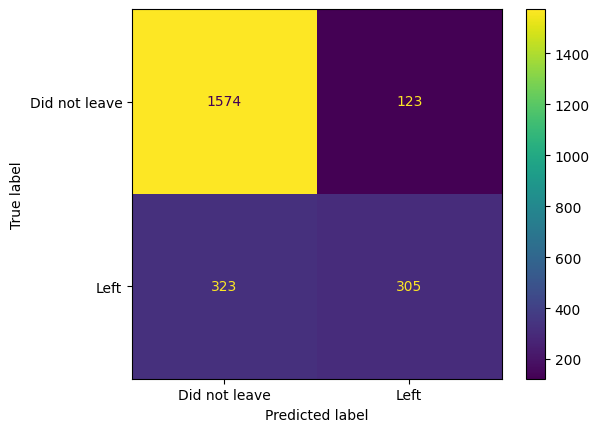

In [23]:
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(
    clf_xgb, X_test, y_test, values_format='d', display_labels=['Did not leave', 'Left'])
plt.show()

### Search optimal param

In [24]:
# Round 1
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5] # NOTE: XGBoost reccomends sum(negative instances) / sum(positive instances)
}

In [28]:
# Round 2
param_grid = {
    'max_depth': [4],
    'learning_rate': [0.1, 0.5, 1.0],
    'gamma': [0.25],
    'reg_lambda': [10.0, 20.0, 100.0],
    'scale_pos_weight': [3] # NOTE: XGBoost reccomends sum(negative instances) / sum(positive instances)
}

In [29]:
optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(
        objective='binary:logistic',
        seed=42,
        subsample=0.9,
        colsample_bytree=0.5
    ),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs=10,
    cv=3
)

optimal_params.fit(X_train,
                   y_train,
                   early_stopping_rounds=10,
                   eval_metric='auc',
                   eval_set=[(X_test, y_test)],
                   verbose=False)
print(optimal_params.best_params_)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 3}


Round 1 ```{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'reg_lambda': 0, 'scale_pos_weight': 5}```

Round 2 ```{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 3}```